# 6.1 Probability Distributions

**Outline:**
* Introduction to probability distributions and empirical distributions
* Bionomial, Poisson, and Gamma distributions for random events


## Additional Assigned Reading

Data 8 textbook "Computational and Inferential Thinking: The Foundations of Data Science" By Ani Adhikari and John DeNero [Chapter 10 Sampling and Empirical Distributions](https://www.inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html). This should overlap with your assigned reading for Data 8.

## Flipping a coin

Let's pretend we are flipping a coin 10 times using ```np.random.choice([0, 1])```. How many times will be heads? 1 is heads, 0 is tails. Let's use a `for` loop and get Python to simulate such a coin flip scenario for us.

The code will get looped through 10 times -- specified by ```range(0,10)```.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
from scipy import stats

for flip in range(0,10):
    flip_result = np.random.choice([0, 1])
    print(flip_result)

1
1
0
0
1
0
1
1
0
0


Now let's record how many times the result was heads. We will make a list called `flip_results` and have it be blank to start. Each time we go through the code we will append the result to the list:

In [2]:
flip_results = []

for flip in range(0,10):
    flip_result = np.random.choice([0, 1])
    flip_results.append(flip_result)
    
flip_results    

[0, 0, 1, 1, 0, 0, 1, 1, 0, 0]

We can calculate how many times were heads by taking the sum of the list:

In [3]:
np.sum(flip_results)

4

Now we'll repeat our expirement of 10 flips 10 times keeping a count of the number of heads in each experiment in `number_heads`.

In [4]:
number_heads = []

for flip_experiment in range (0,10):

    flip_results = []
    
    for flip in range(0,10):
        flip_result = np.random.choice([0, 1])
        flip_results.append(flip_result)
    
    number_heads.append(np.sum(flip_results))   
        
number_heads

[8, 5, 6, 6, 7, 5, 6, 4, 7, 5]

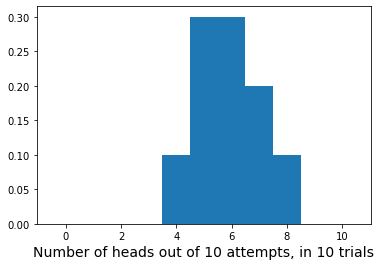

In [5]:
plt.hist(number_heads,bins=np.arange(-0.5,11.5,1.0),density=True)
plt.xlabel('Number of heads out of 10 attempts, in 10 trials',  fontsize=14)
plt.show()

Instead of doing 10 coin flips 10 times, do 10 coin flips 1000 times. Plot the histogram of the result.

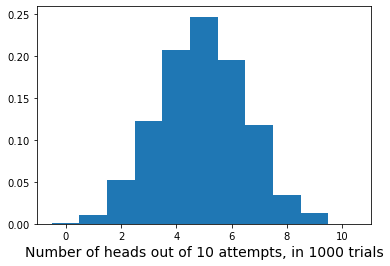

In [6]:
number_heads = []

for flip_experiment in range (0,1000):

    flip_results = []
    
    for flip in range(0,10):
        flip_result = np.random.choice([0, 1])
        flip_results.append(flip_result)
    
    number_heads.append(np.sum(flip_results))   
        
plt.hist(number_heads,bins=np.arange(-0.5,11.5,1.0),density=True)
plt.xlabel('Number of heads out of 10 attempts, in 1000 trials',  fontsize=14)
plt.show()

## Basic statistical concepts

_Statistics_ are the methods by which we analyze, interpret and model data. It is helpful to understand a few concepts: 

1) **Population** versus **sample**: the _population_ is the set of all possible outcomes of a given measurement (if you had an infinite number of data points), while the _sample_ is what you have - a finite number of data points.  

2) **Probability**: the measure of how likely it is for a particular event to occur.  If something is impossible, it has a probability $P$ of 0.  If it is a certainty, it has a probability $P$ of 1. In our coin flip experiment both heads and tails had equal probabilty of 0.5.

3) **Theoretical** versus **empirical** distributions: Empirical distributions are measured data. Theoretical distributions are analytical probabililty functions described with an equation.  These can be applied to data, allowing interpretations about the likelihood of observing a given measurement.  

 
Additional resources: Olea (2008): https://pubs.usgs.gov/of/2008/1017/ofr2008-1017_rev.pdf; Davis, J. (2002): Statistical and Data Analysis in Geology, 3rd Ed, Wiley, Hoboken. 

There are many different types of probability distributions and evaluating the equations gives us a theoretical distribution. 

Samples are finite collections of observations which belong to a distribution. In this exercise, we will simulate 'measurements' by drawing 'observations' from a theoretical distribution.  This is the _Monte Carlo_ approach (named after the gambling town). 

**We just simulated an experiment of flipping a coin. Let's compare what we got through that simulation to the theoretical distribution.**

## Probability Distributions 
### Binomial Distribution

A relatively straight-forward distribution is the _binomial_ distribution which describes the probability of a particular outcome when there are only two possibilities (yes or no, heads or tails, 1 or 0).   For example, in a coin toss experiment (heads or tails), if we flip the coin  $n$ times, what is the probability of getting $x$ 'heads'?  We assume that the probability $p$ of a head for any given coin toss is 50%; put another way $p$ = 0.5.  

The binomial distribution can be described by an equation: 

$$P=f(x,p,n)= \frac{n!}{x!(n-x)!}p^x(1-p)^{n-x}$$

We can look at this kind of distribution by evaluating the probability for getting $x$ 'heads' out of $n$ attempts. We'll code the equation as a function, and calculate the probability $P$ of a particular outcome (e.g., $x$ heads in $n$ attempts). 

Note that for a coin toss, $p$ is 0.5, but other yes/no questions can be investigated as well (e.g., chance of finding a fossil in a sedimentary layer, whether or not a landslide occurs following an earthquake). 


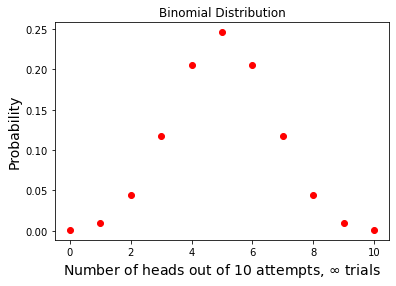

In [7]:
n=10 # number of attempts in each trial
p=0.5 # probability of getting a head
x=np.arange(0,n+1,1) # range of test values from 0,N

# initialize size of probability array
bi_prob = np.zeros(len(x)) 

# compute the binomial probability of getting x outcomes in n attempts
for i in np.arange(0,len(x),1):
    bi_prob[i] = (np.math.factorial(n)*(p**(x[i]))*(1.-p)**(n-x[i]) /(np.math.factorial(x[i])*np.math.factorial(n-x[i])))

#plot the probability distribution
plt.plot(x,bi_prob,'ro',linewidth=2) # plot as solid line
plt.xlabel('Number of heads out of 10 attempts, $\infty$ trials',  fontsize=14) # add labels
plt.ylabel('Probability',  fontsize=14) 
plt.title('Binomial Distribution')
plt.show()

Notice how similiar this is to the histogram we made of our 1000 experiments of 10 coin flips. Also notice that with only 10 experiments the empirical histogram of heads does not look much like the theoretical distribution.

### Poisson Distribution

The Poisson distribution gives the probability that an event (with two possible outcomes) occurs $k$ number of times in an interval of time where $\lambda$ is the expected rate of occurance. The Poisson distribution is the limit of the binomial distribution for large $n$. So if you take the limit of the binomial distribution as $n \rightarrow \infty$

$$\lim_{n \rightarrow \infty } \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k} = \frac{n!}{k!(n-k)!}(\frac{\lambda}{n})^k(1-\frac{\lambda}{n})^{n-k} $$

you'll get the Poisson distribution:

$P(k$ events in interval$) = e^{-\lambda}\frac{\lambda^{k}}{k!}.$

Because $\lim_{x \rightarrow \infty } (1+\frac{a}{x})^{x}=e^{a}$ and $\lim_{x \rightarrow \infty } \frac{x!}{x^{k}(x-k)!} = 1$

**Watach these two videos explaining Poisson processes, from Khan Academy:**

[Poisson Process 1](https://www.khanacademy.org/math/statistics-probability/random-variables-stats-library/poisson-distribution/v/poisson-process-1)

[Poisson Process 2](https://www.khanacademy.org/math/statistics-probability/random-variables-stats-library/poisson-distribution/v/poisson-process-2)



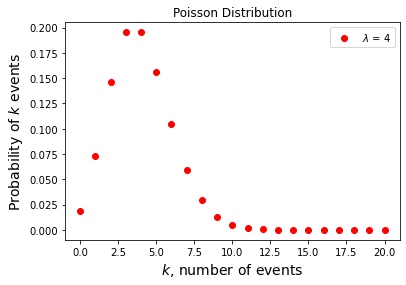

In [8]:
lam = 4 # average rate of occurance (e.g. cars per hour)
k = np.arange(0,21,1) # number of times the event actually occurs (e.g. observed cars in an hours)

# initialize size of probability array
pos_prob = np.zeros(len(k)) 

# compute the binomial probability of getting x outcomes in n attempts
for i in np.arange(0,len(k),1):
    pos_prob[i] = (np.exp(-1*lam))*(lam**k[i])/np.math.factorial(k[i])
    
# plot    
plt.plot(k,pos_prob,'ro',label='$\lambda$ = 4') # theoretical curve for lam = 4
plt.xlabel('$k$, number of events',  fontsize=14)
plt.ylabel('Probability of $k$ events',  fontsize=14)
plt.title('Poisson Distribution');
plt.legend();

### Gamma Distribution

The Gamma distribution gives the probability of a waiting interval between Poisson distributed events (that is an event that randomly occurs but for which is there is an average time period between the events).

Consider the distribution function $D(x)$ of waiting times until the $h$th Poisson event given a Poisson distribution with a rate of occurance $\lambda$,

$$ D(x) = P (X \le x) = 1 - P(X > x) = 1-\sum_{k=0}^{h-1}\frac{(\lambda x)^{k}e^{-\lambda x}}{k!} = 1-e^{-\lambda x}\sum_{k=0}^{h-1}\frac{(\lambda x)^{k}}{k!} = 1-\frac{\Gamma(h,x\lambda) }{\Gamma (h)}$$ 

where $\Gamma (x) = (x-1)!$ is a complete gamma function and $\Gamma (n,x) = (n-1)! e^{-x}\sum_{k=0}^{n-1}\frac{x^{k}}{k!}$ an incomplete gamma function. The corresponding probability function $P(x)$ of waiting times until the $h$th Poisson event is then obtained by differentiating  $D(x)$,

$$ P(x) = D'(x) = \frac{\lambda (\lambda x)^{h-1}}{(h-1)!}e^{-\lambda x} $$

Now let $\alpha=h$ (not necessarily an integer) and define $\theta=1/\lambda$ to be the time between occurances. Then the above equation can be written

$$ P(x) = \frac{x^{\alpha-1}e^{-x/\theta}}{\Gamma (\alpha) \theta^{\alpha}} $$

which is the probability of a duration time $x$ between events.

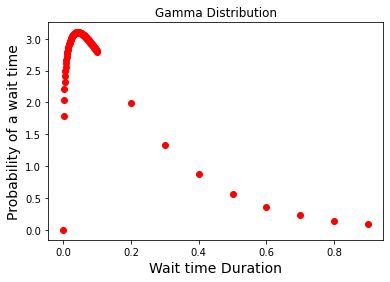

In [9]:
# theoretical gamma prob distribution
alpha = 1.2
avg_dur = 1/4 # average wait time (4 cars per hours so 1/4 hour)
theta = avg_dur / alpha;
wait_time = np.concatenate((np.arange(0.0,0.1,0.001),np.arange(0.1,1.0,0.1)), axis=None)
gamma_prob = np.zeros(len(wait_time))
for i in np.arange(0,len(wait_time),1):
    gamma_prob[i] = (wait_time[i]**(alpha - 1) * np.exp(-1*wait_time[i]/theta)) / (scipy.special.gamma(alpha)* theta**alpha)


# plot
plt.plot(wait_time,gamma_prob,'ro') # theoretical curve 
plt.xlabel('Wait time Duration',  fontsize=14)
plt.ylabel('Probability of a wait time',  fontsize=14)
plt.title('Gamma Distribution')
plt.show()

